# Multiple stationary bodies
Adding multiple bodies to a problem is easy, using the concept of a `BodyList`.
Here, we demonstrate this with a problem with multiple stationary bodies.

In [1]:
using ViscousFlow

In [2]:
using Plots
using Statistics

In this example, we will set up a problem with three cylinders arranged in a
formation in a free stream.

In [3]:
my_params = Dict()
my_params["Re"] = 200
my_params["freestream speed"] = 1.0
my_params["freestream angle"] = 0.0

0.0

Set up the domain and surface point spacing

In [4]:
xlim = (-2.0,4.0)
ylim = (-2.0,2.0)
my_params["grid Re"] = 4.0
g = setup_grid(xlim,ylim,my_params)
Δs = surface_point_spacing(g,my_params)

0.027999999999999997

### Set up bodies
We start by initializing a `BodyList`, and then pushing bodies onto the list.
For each body, we create a joint that will attach it to the inertial system.
Each joint requires a `MotionTransform` to configure it, and now, a second argument that specifies
which body we are joining.

In [5]:
bl = BodyList()

BodyList(Body[])

Place the first body at (-1,0)

In [6]:
push!(bl,Circle(0.5,Δs))
joint1 = Joint(MotionTransform([-1,0],0),1);

Place the second body at (1,-1)

In [7]:
push!(bl,Circle(0.5,Δs))
joint2 = Joint(MotionTransform([1,-1],0),2);

and place the third body at (1,1)

In [8]:
push!(bl,Circle(0.5,Δs))
joint3 = Joint(MotionTransform([1,1],0),3);

 Perform the actual transformation. Note that we are using the same
 functions as in the case of a single body, but now with vectors of joints and bodies.
 `update_body!` changes each body in the list *in-place*:

In [9]:
m = RigidBodyMotion([joint1,joint2,joint3],bl)
x = zero_motion_state(bl,m)
update_body!(bl,x,m)

BodyList(Body[Circular body with 112 points and radius 0.5
   Current position: (-1.0,0.0)
   Current angle (rad): 0.0
, Circular body with 112 points and radius 0.5
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0
, Circular body with 112 points and radius 0.5
   Current position: (1.0,1.0)
   Current angle (rad): 0.0
])

#### Plot the initial configuration of the bodies
Just to check they are in the right places

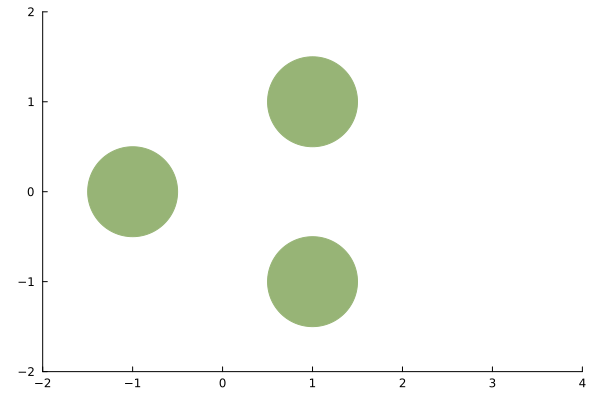

In [10]:
plot(bl,xlim=xlim,ylim=ylim)

### Construct the system structure
We construct the system with the same syntax as for a single body:

In [11]:
sys = viscousflow_system(g,bl,phys_params=my_params,motions=m);

In [12]:
u0 = init_sol(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 306, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 306, ny = 208), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

### Solve
Here, we run it for a little while, just to demonstrate:

In [13]:
@time step!(integrator,2.0)

 21.020492 seconds (10.89 M allocations: 2.757 GiB, 1.59% gc time, 17.00% compilation time)


### Examine
Let's inspect the results

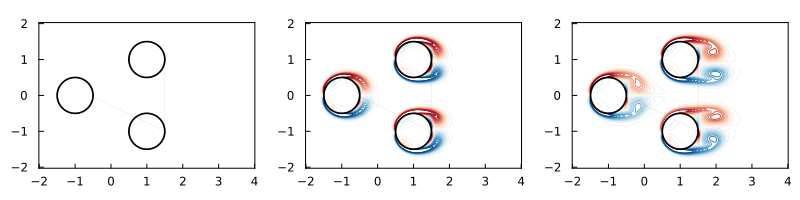

In [14]:
sol = integrator.sol
plt = plot(layout = (1,3), size = (800, 200), legend=:false)
tsnap = 0.0:1.0:2.0
for (i, t) in enumerate(tsnap)
    plot!(plt[i],vorticity(sol,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu)
end
plt

Now we will examine the force on each body

In [15]:
fx1, fy1 = force(sol,sys,1)
fx2, fy2 = force(sol,sys,2)
fx3, fy3 = force(sol,sys,3);

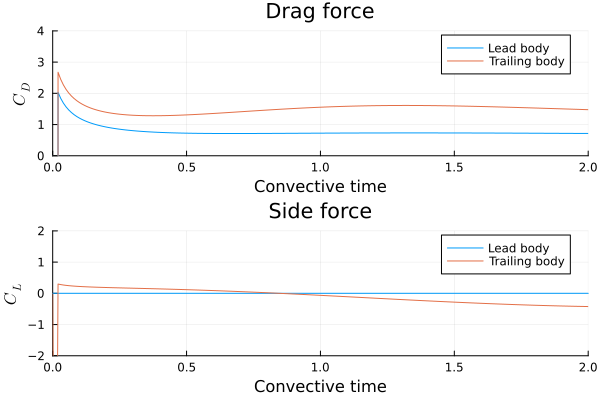

In [16]:
plt = plot(layout = (2,1), size = (600, 400))
plot!(plt[1],sol.t,2*fx1,xlim=(0,Inf),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Lead body",title="Drag force")
plot!(plt[2],sol.t,2*fy1,xlim=(0,Inf),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Lead body",title="Side force")
plot!(plt[1],sol.t,2*fx2,xlim=(0,Inf),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Trailing body",title="Drag force")
plot!(plt[2],sol.t,2*fy2,xlim=(0,Inf),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Trailing body",title="Side force")

In [17]:
println("Mean drag coefficient on lead body = ", mean(2*fx1[3:end]))

Mean drag coefficient on lead body = 0.7846371732833703


In [18]:
println("Mean drag coefficient on trailing body = ", mean(2*fx2[3:end]))

Mean drag coefficient on trailing body = 1.516088082548963


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*